#Ex-1 ADS By Sreevalsan-212223240158

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
df=pd.read_csv('/content/Life Expectancy Data CSV.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,63.537231,2978599.0,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [5]:
numerical_columns=df.select_dtypes(include=['number']).columns

In [6]:
numerical_columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       'GDP', 'Population', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
columns_to_fill = [
    'Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
    ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ',
    'GDP', 'Population', 'Income composition of resources', 'Schooling'
]

# Filling missing values with median
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())



In [8]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


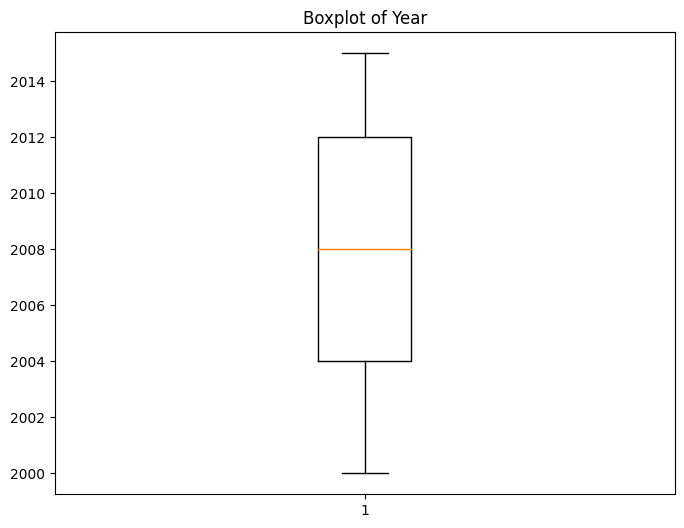

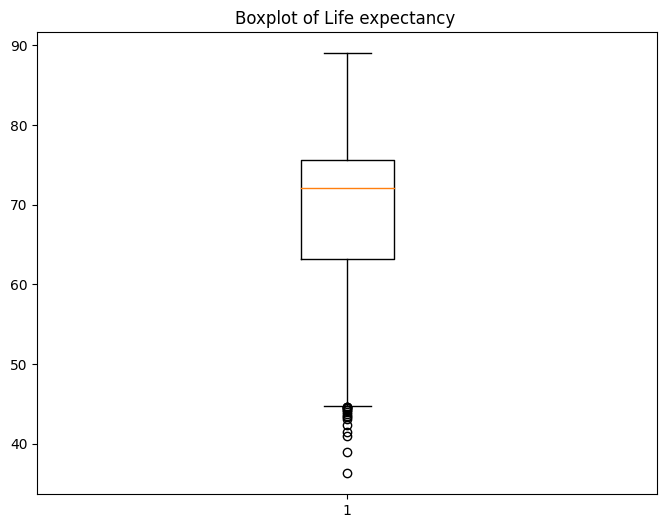

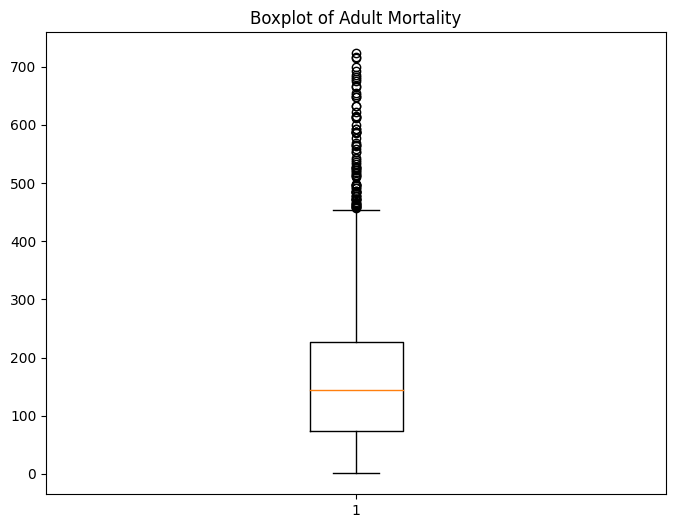

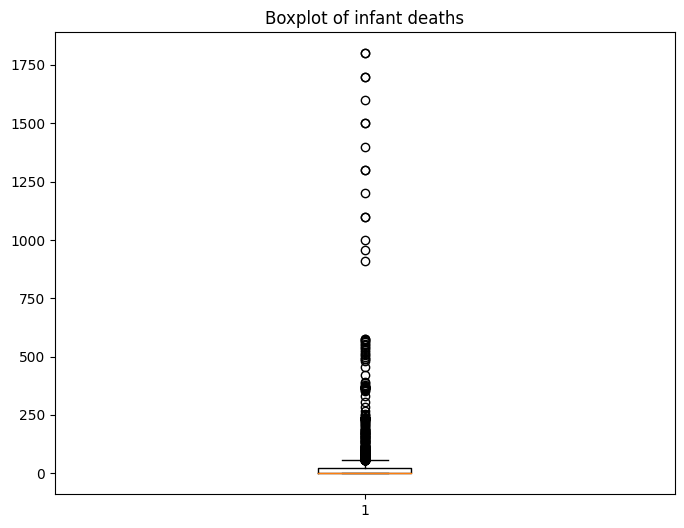

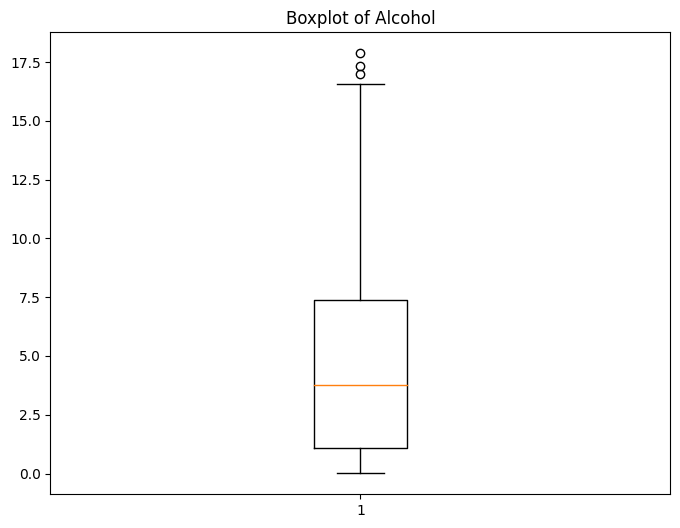

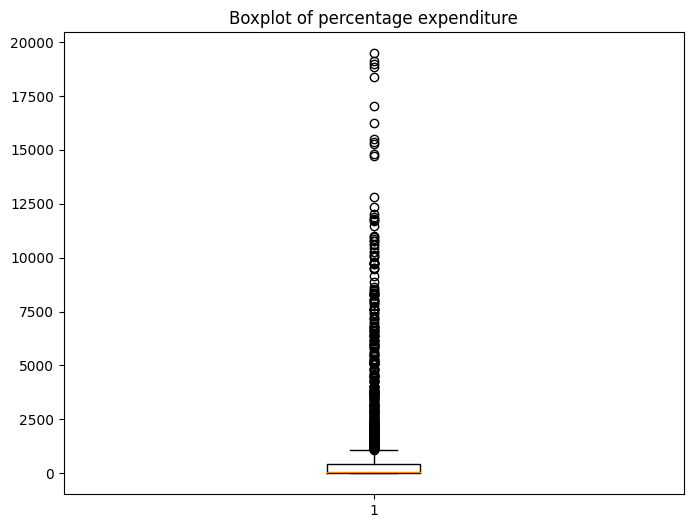

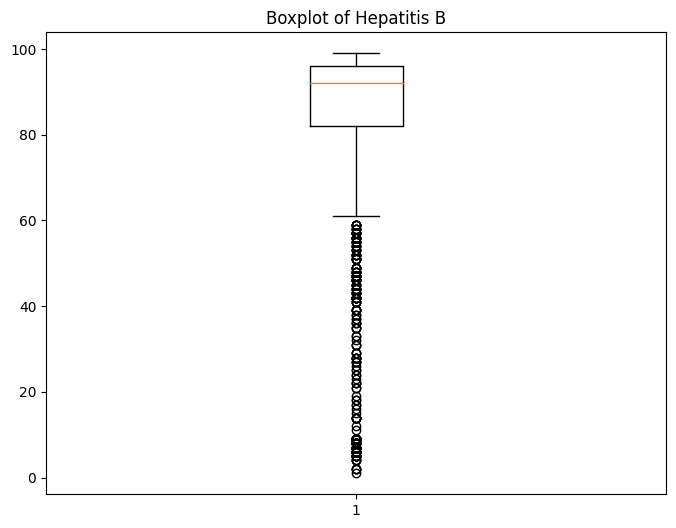

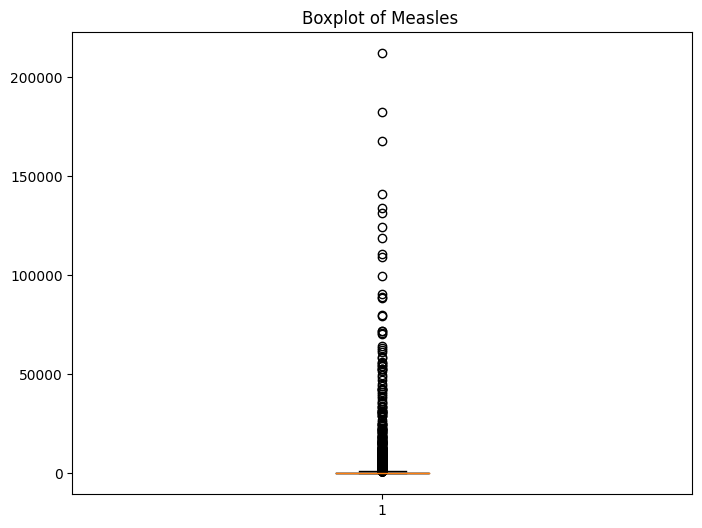

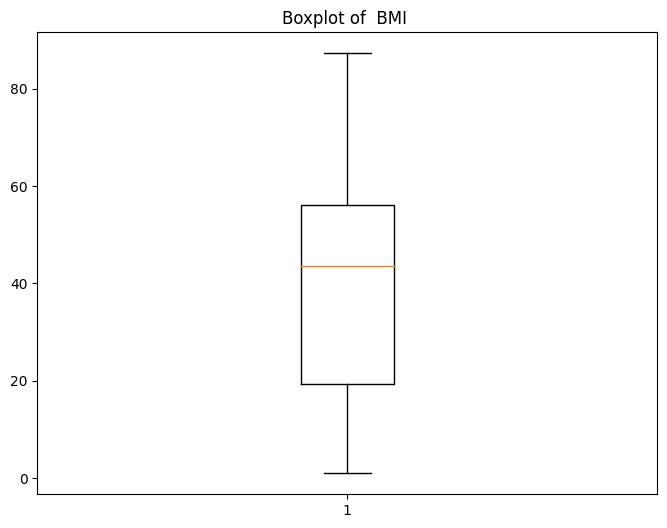

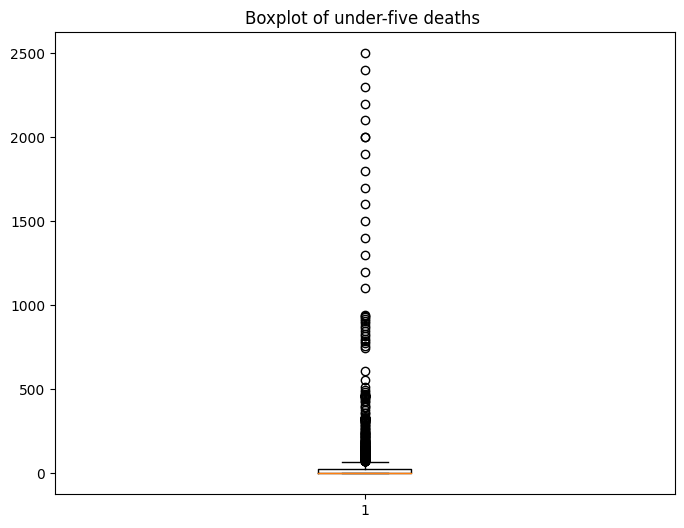

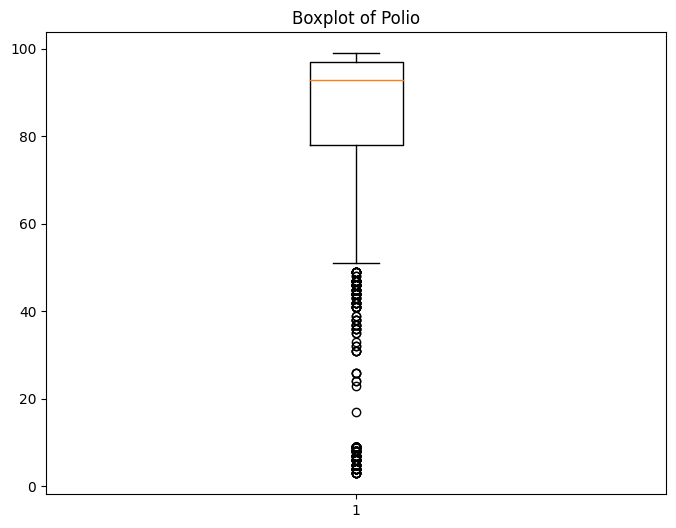

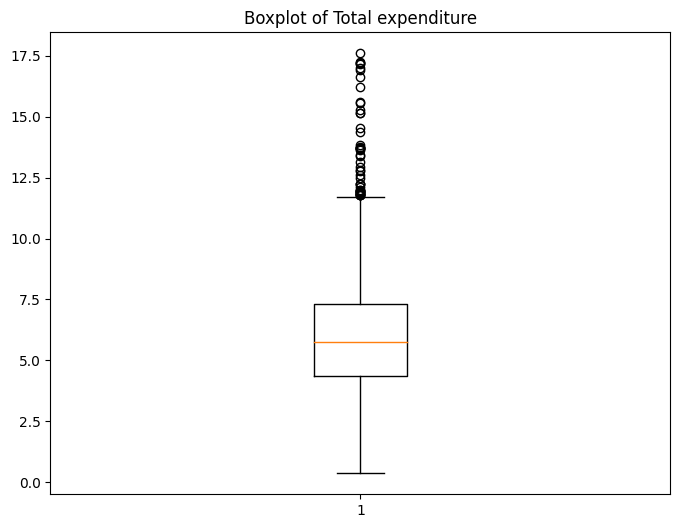

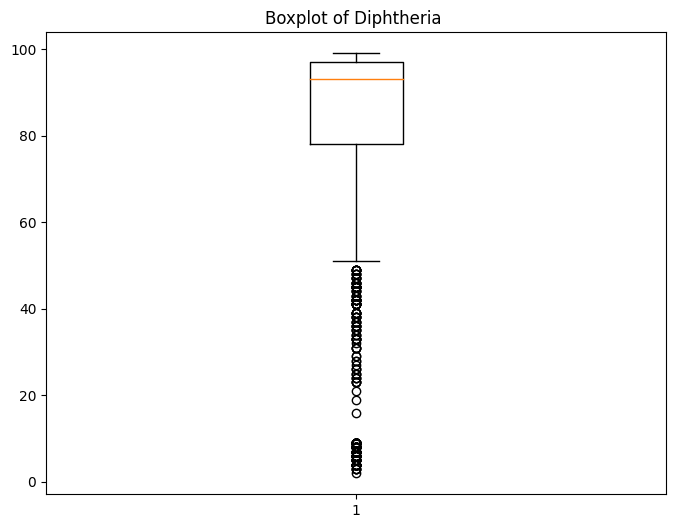

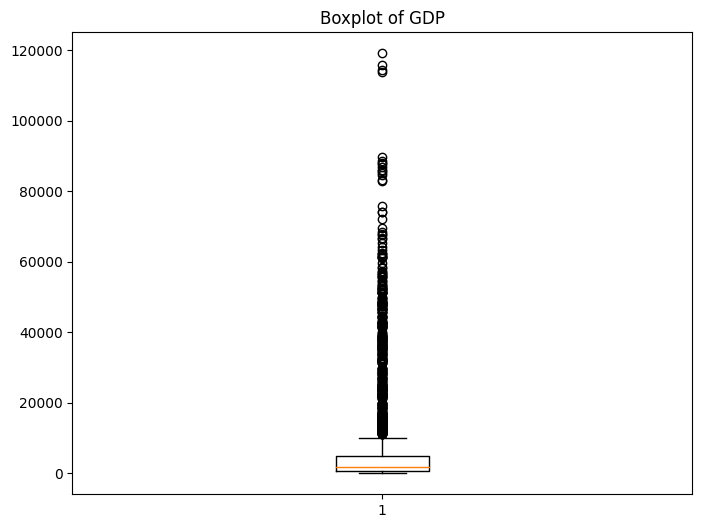

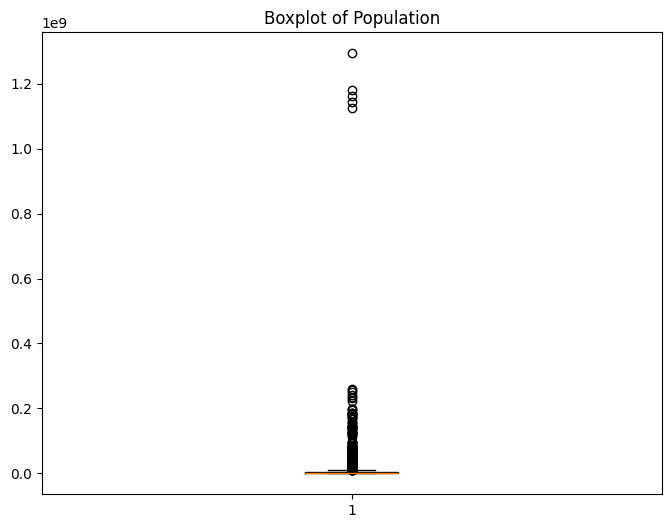

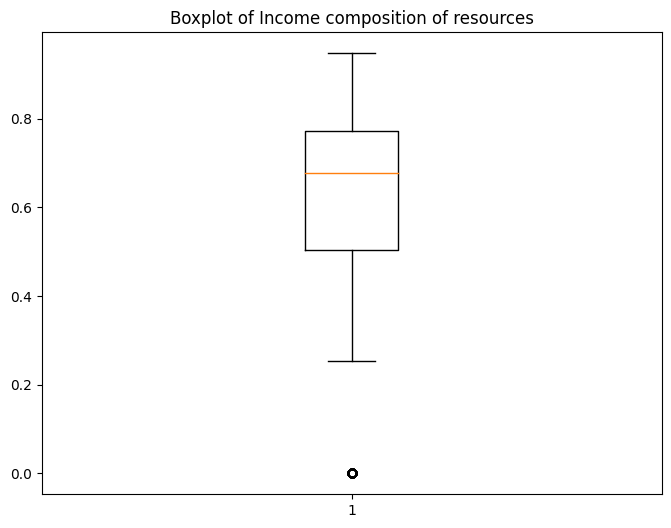

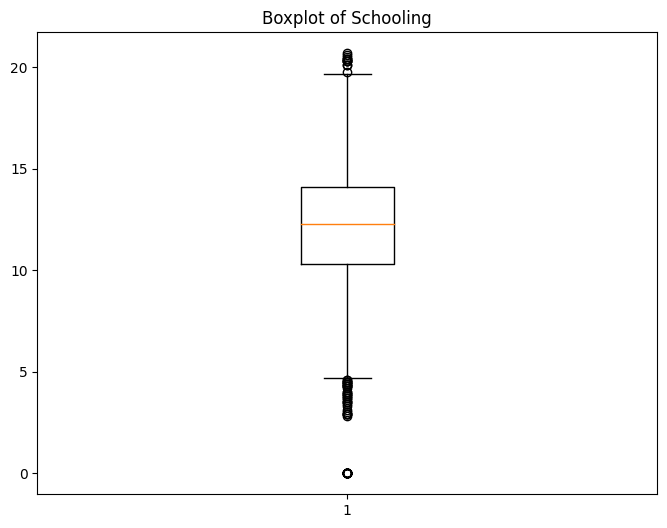

In [9]:
for column in numerical_columns:
  plt.figure(figsize=(8,6))
  plt.boxplot(df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

In [10]:
import pandas as pd
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

df_cleaned = df.copy()

for column in numerical_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

print("Shape of DataFrame after outlier removal:", df_cleaned.shape)


Shape of DataFrame after outlier removal: (784, 19)


In [11]:
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['Country', 'Status'], dtype='object')


In [12]:
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df_cleaned[column].value_counts())
    print("\n")


Value counts for Country:
Country
Belize                16
Slovakia              16
Czechia               16
Albania               15
Fiji                  15
                      ..
Cook Islands           1
Denmark                1
Dominica               1
Russian Federation     1
Monaco                 1
Name: count, Length: 126, dtype: int64


Value counts for Status:
Status
Developing    648
Developed     136
Name: count, dtype: int64




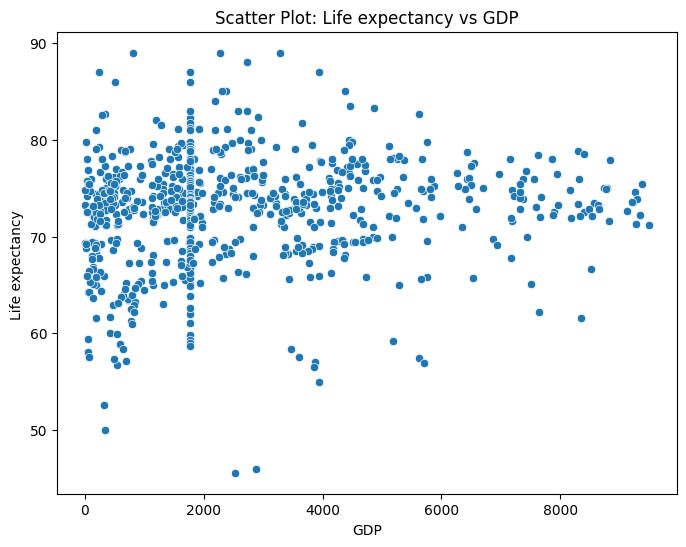

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP', y='Life expectancy ', data=df_cleaned)
plt.title('Scatter Plot: Life expectancy vs GDP')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


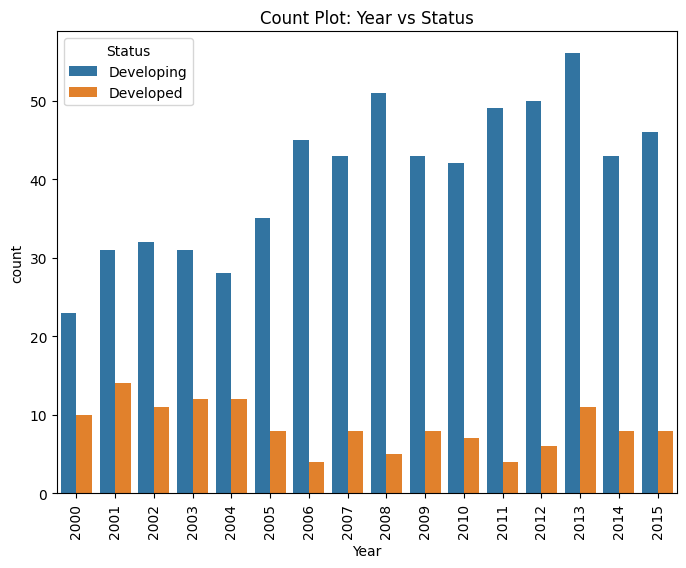

In [14]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Year', hue='Status', data=df_cleaned)
plt.title('Count Plot: Year vs Status')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


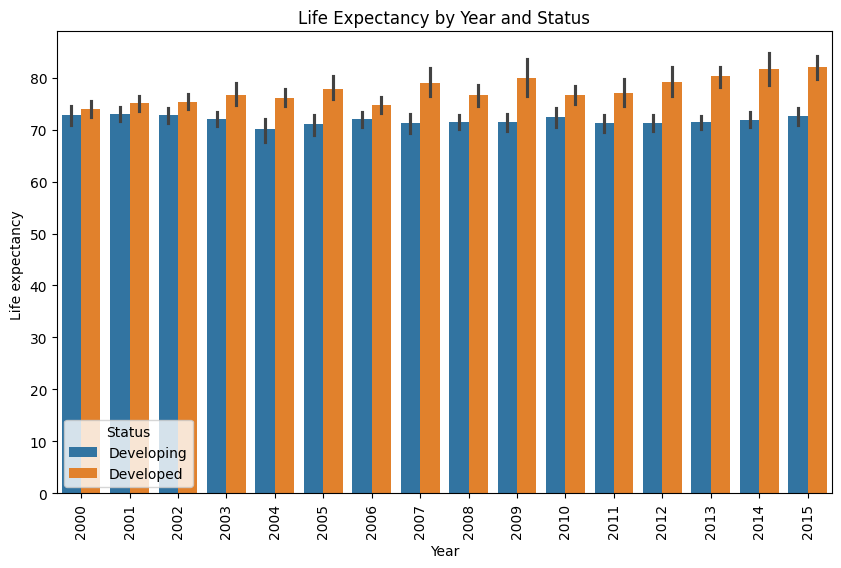

In [15]:
# Grouped box plot: 'Life expectancy' by 'Status' and 'Year'
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Life expectancy ', hue='Status', data=df_cleaned)
plt.title('Life Expectancy by Year and Status')
plt.xticks(rotation=90)
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cleaned['Country']=le.fit_transform(df_cleaned['Country'])


In [17]:
!pip install category_encoders
from category_encoders import BinaryEncoder
be=BinaryEncoder()
nbe=be.fit_transform(df_cleaned['Status'])
df_cleaned=pd.concat([df_cleaned,nbe],axis=1)
df_cleaned.drop(columns=['Status'],inplace=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.7 MB/s eta 0:00:00


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
columns_to_scale=['Life expectancy ','infant deaths', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'GDP', 'Income composition of resources',
       'Schooling']
df_cleaned[columns_to_scale]=scaler.fit_transform(df_cleaned[columns_to_scale])

In [19]:
from sklearn.preprocessing import RobustScaler
rscaler=RobustScaler()
columns_to_rscaler=['Adult Mortality', 'percentage expenditure','Measles ', 'Population']
df_cleaned[columns_to_rscaler]=rscaler.fit_transform(df_cleaned[columns_to_rscaler])

In [20]:
df_cleaned.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,Income composition of resources,Schooling,Status_0,Status_1
16,0,2015,0.741935,-0.579572,0.0,0.270318,0.876653,1.000000,0.000000,0.656103,0.000000,1.000000,0.487562,1.000000,0.416396,-0.716389,0.664804,0.626374,0,1
17,0,2014,0.735023,-1.206651,0.0,0.265018,1.069650,0.969697,0.000000,0.646714,0.045455,0.961538,0.475622,0.944444,0.481985,-0.508151,0.662942,0.626374,0,1
18,0,2013,0.728111,-0.484561,0.0,0.279741,1.076090,1.000000,0.000000,0.638498,0.045455,1.000000,0.453731,1.000000,0.464991,-0.507608,0.659218,0.626374,0,1
19,0,2012,0.721198,-0.465558,0.0,0.302120,1.020305,1.000000,0.972973,0.630282,0.045455,1.000000,0.446766,1.000000,0.447357,-0.737155,0.646182,0.626374,0,1
20,0,2011,0.714286,-0.446556,0.0,0.315665,1.094808,1.000000,3.027027,0.622066,0.045455,1.000000,0.458706,1.000000,0.467361,-0.503121,0.620112,0.527473,0,1


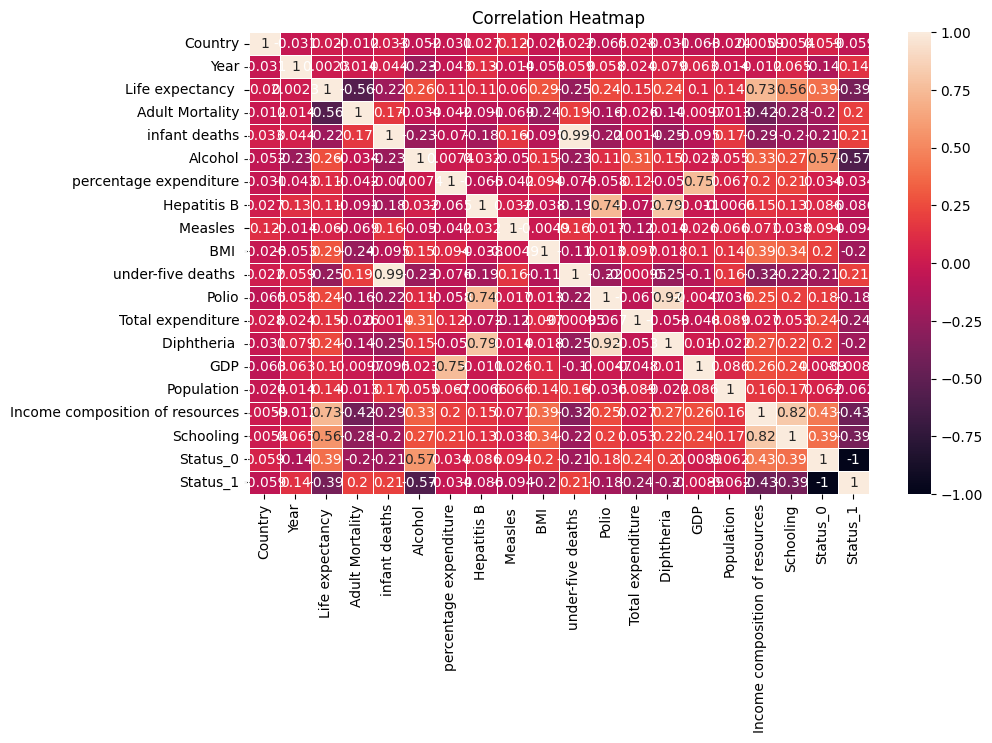

In [21]:

corr_matrix = df_cleaned.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

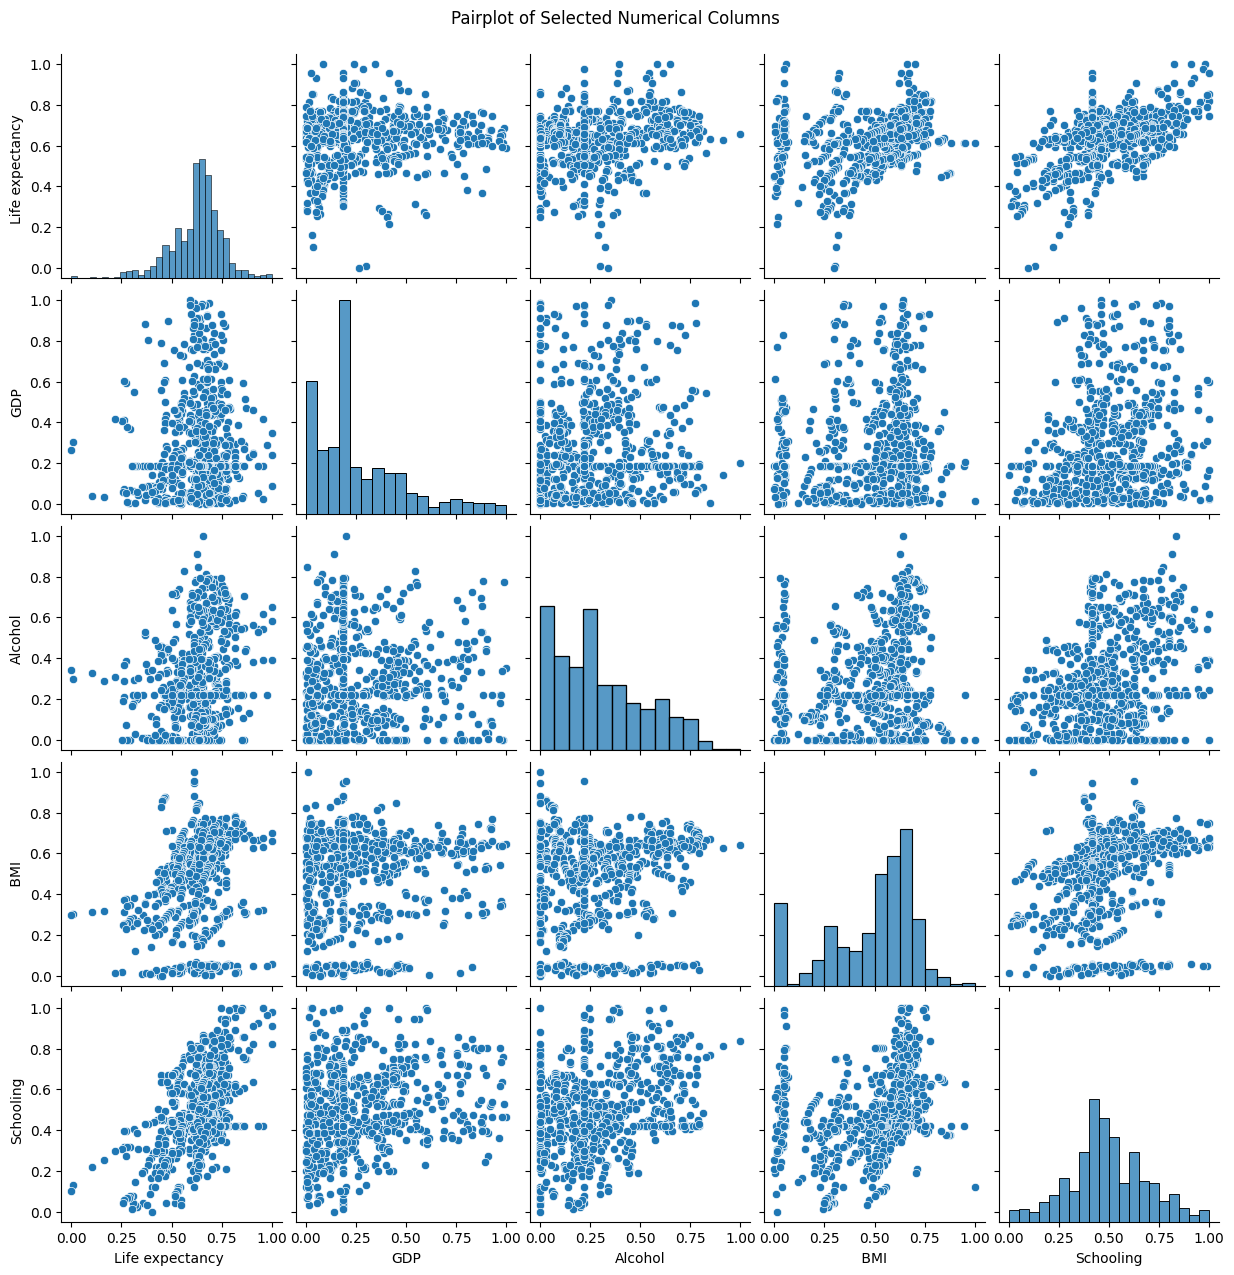

In [22]:

selected_columns = ['Life expectancy ', 'GDP', 'Alcohol', ' BMI ', 'Schooling']


sns.pairplot(df_cleaned[selected_columns])
plt.suptitle('Pairplot of Selected Numerical Columns', y=1.02)
plt.show()


In [24]:
print("Sreevalsan-212223240158")

Sreevalsan-212223240158
